# Try changing the distribution

In [161]:
%reset -f
import numpy as np
from LebedevHelper import *

import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.special as spec
import matplotlib as mpl
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import scipy.integrate as integrate
%matplotlib inline

In [162]:
print(pi2)
func_g2(2)

6.283185307179586


1.0

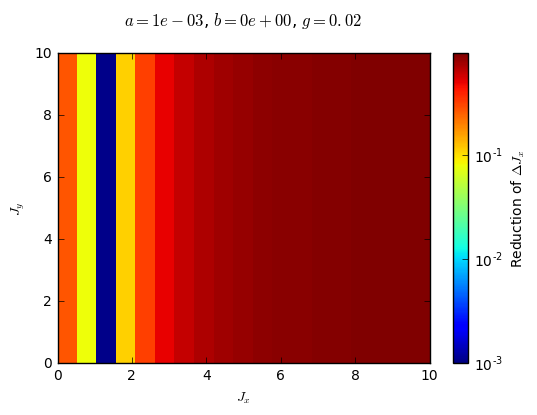

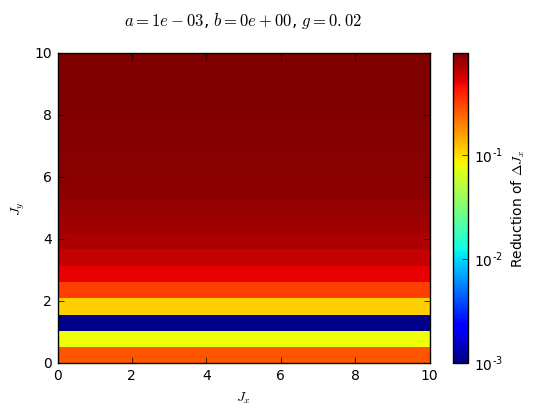

In [163]:
###################################################
a= 1e-3
b= 0
# a = 1.64e-4  ;  b = -1.16e-4
# a = 2*a
g= 0.02
jmax= 10
jx = np.linspace(0,jmax,20)
jy = jx
JX,JY = np.meshgrid(jx,jy)

for i in [1,2]:

    if i==1:
        F = octu_leb(JX,JY,a,b,g)
    else:
        F = octu_leb(JX,JY,b,a,g)
    vmin = np.min(F)
    vmax = np.max(F) 
    # vmax = 1.0
    vmin = 10**(int(np.log10(vmax * 1e4)-7))
    plt.figure()
    plt.pcolor(JX,JY,F,norm =LogNorm(vmin=vmin,vmax=vmax))
    plt.colorbar(label=r'Reduction of $\Delta J_x$')
    plt.title(r"$a=%.0e$, $b=%.0e$, $g=%.2f$"%(a,b,g)+'\n')
    plt.xlabel(r'$J_x$')
    plt.ylabel(r'$J_y$')
    plt.savefig("03_Plots/DACTX_JxJy_a=%.0e_b=%.0e_g=%.0e.eps"%(a,b,g))




In [166]:
# f = lambda y, x: x*y**2
# integrate.dblquad(f, 0, 2, lambda x: 0, lambda x: 1)
# integrate.dblquad(int_octu_leb,0,100,lambda x : 0 , lambda x: 100 , args = (a,b,g,))


(0.1746740138484229, 1.458643626728015e-08)

a 0.001
b -0.0
x 0.0 0.0166666666667 0.833333333333
y 0.0 0.0166666666667 0.833333333333
Max growth 0.833333333333
Jx (1000000,)
Jy (1000000,)
Weights (1000000,)
[]


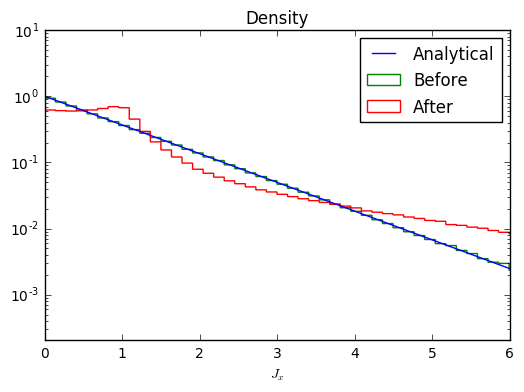

In [176]:
#Initial distribution
nbin=100
nbin2=100
 
a=1e-3 
b=-a * 0 
g= 0.02

noiseAmp = 0.0
sepx = 0.1* np.sqrt(10)/np.sqrt(3)
sepy = 0.1* np.sqrt(10) /np.sqrt(3)
N = int(1e6)
numt = 50
Jmax=6
dist=1

dJx_exp = 0.5*sepx**2
dJy_exp = 0.5*sepy**2
print('a',a)
print('b',b)
print("x",noiseAmp,dJx_exp,dJx_exp*numt)
print("y",noiseAmp,dJy_exp,dJy_exp*numt)
print("Max growth",numt*dJx_exp)


if dist==1:
    Jx = st.chi2.rvs(2, size=N)*0.5
    Jy = st.chi2.rvs(2, size=N)*0.5
    weights = np.ones(N)
elif dist==2:
    Jx = np.random.uniform(0,Jmax,N)
    Jy = np.random.uniform(0,Jmax,N)
    weights = np.exp(-Jx-Jy)
elif dist==3:
    N1 = int(N/2)
    Jx1 = st.chi2.rvs(2, size=N1)*0.5
    Jy1 = st.chi2.rvs(2, size=N1)*0.5
    weights1 = np.ones(N1)
    Jx2 = np.random.uniform(0,Jmax,N-N1)
    Jy2 = np.random.uniform(0,Jmax,N-N1)
    weights2 = np.exp(-Jx2-Jy2)
    Jx = np.concatenate((Jx1,Jx2))
    Jy = np.concatenate((Jy1,Jy2))
    weights = np.concatenate((weights1,weights2))

print('Jx',np.shape(Jx))
print('Jy',np.shape(Jy))
print('Weights',np.shape(weights))


Jx0 = Jx.copy()
Jy0 = Jy.copy()

plt.figure()
x = np.linspace(0,Jmax*1.2,100)
plt.plot(x,np.exp(-x),label='Analytical')

vals,edges = np.histogram(Jx,bins=nbin,normed=True,weights=weights);
# center = center_edges(edges)
# plt.plot(center,vals,label='Before')
plt.hist(Jx,bins=edges,normed=True, histtype='step',label='Before',weights=weights)

fac = integrate.nquad(int_octu_leb, [[0,100],[0,100]],args = (a,b,g))[0]
for i in range(numt):
    if 1:
        Jx+= (dJx_exp +sepx*np.sqrt(2*Jx)*np.cos(np.1andom.uniform(0,pi2,N)) )*octu_leb(Jx,Jy,a,b,g)
        Jy+= (dJy_exp +sepy*np.sqrt(2*Jy)*np.cos(np.random.uniform(0,pi2,N)) )*octu_leb(Jx,Jy,b,a,g)
    

    elif 1:
        #Try to modify. the current one is o so wrong
        fac = octu_leb(Jx,Jy,a,b,g)
        Jx+= (dJx_exp )*fac + sepx*np.sqrt(2*Jx)*np.cos(np.random.uniform(0,pi2,N))*fac**(0.5)
        Jy+= (dJy_exp )*octu_leb(Jx,Jy,b,a,g) + sepy*np.sqrt(2*Jy)*np.cos(np.random.uniform(0,pi2,N))*1
        Jx = np.abs(Jx) 
        Jy = np.abs(Jy) 
        
    else:
        Jx+= dJx_exp*octu_leb(Jx,Jy,a,b,g)
        Jy+= dJy_exp*octu_leb(Jx,Jy,a,b,g)

        Jx += np.random.randn(N)*noiseAmp# np.sqrt(np.random.randn(N)**2)*noiseAmp
        Jy += np.random.randn(N)*noiseAmp
        Jx  =  np.abs(Jx)
        Jy  = np.abs(Jy)
        
# vals,edges = np.histogram(Jx,bins=edges,normed=True);
# center = center_edges(edges)
# plt.plot(center,vals,label='After')

print(Jx[Jx<0])
vals,_,_=plt.hist(Jx,bins=edges,normed=True, histtype='step',label='After',weights=weights)
plt.xlim(0,Jmax)
# plt.ylim(np.min(vals[int(nbin/2):]),10) #[np.nonzero(a)]
plt.ylim(np.min(vals[np.nonzero(vals)]),10)
plt.yscale('Log')
plt.legend(loc=0)
plt.xlabel(r'$J_x$')
plt.title("Density")


/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in true_divide
/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:59: RuntimeWarning: invalid value encountered in true_divide


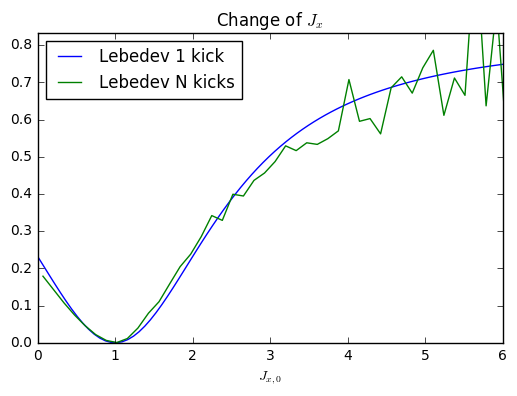

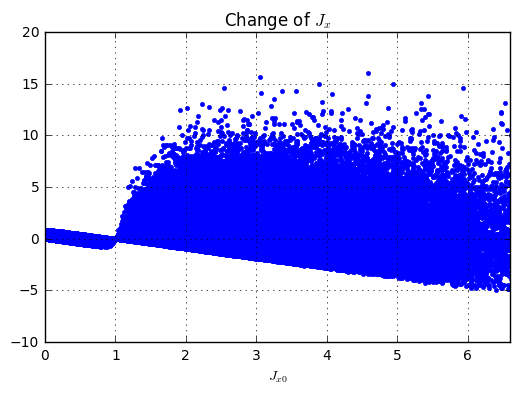

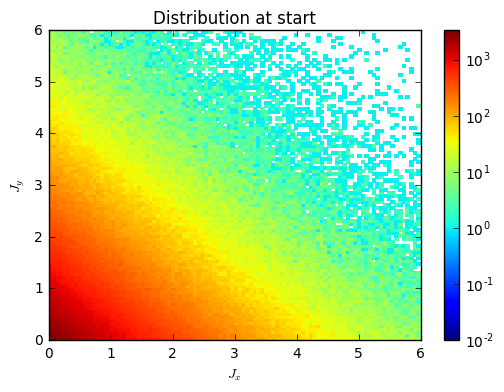

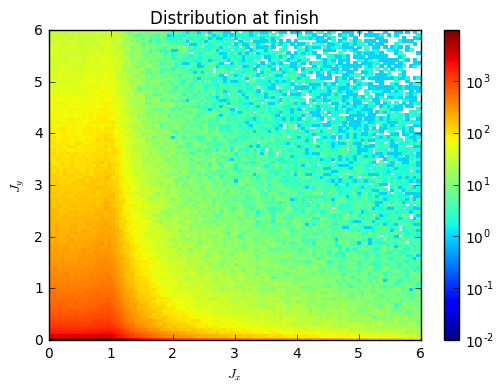

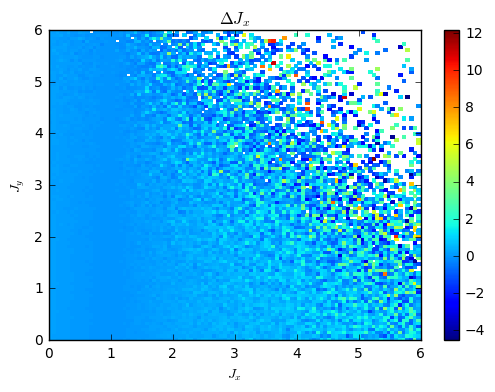

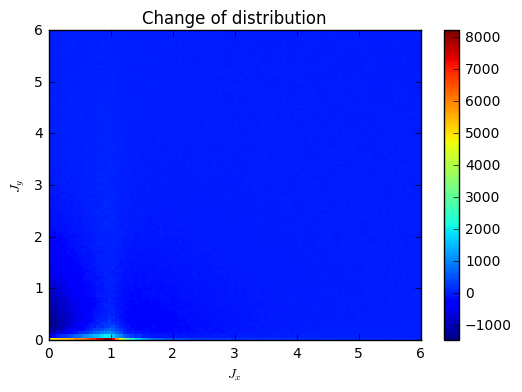

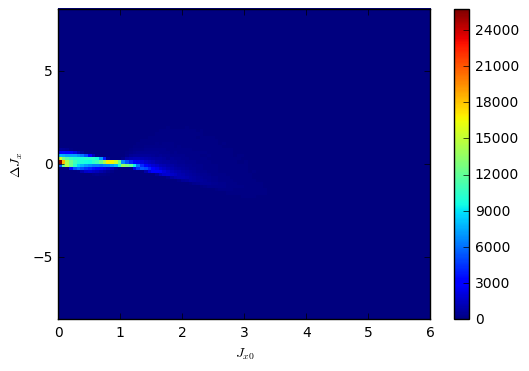

In [177]:
plt.figure()
plt.xlabel(r'$J_{x,0}$')
plt.title(r"Change of $J_x$")
xx=Jx0
W,edges = np.histogram(xx,bins=edges)
vals,_ = np.histogram(xx,bins=edges,weights=Jx-Jx0)
vals = vals/W

leb1=np.zeros_like(x)
for i,J in enumerate(x):
    leb1[i] = integrate.quad(intJy_octu_leb,0,100,args = (J,a,b,g))[0]


plt.plot(x, dJx_exp*numt*leb1,label='Lebedev 1 kick')
# plt.plot(x,dJx_exp*numt*octu_leb(x,0,a,b,g),label='Lebedev')
plt.plot(center_edges(edges),vals,label='Lebedev N kicks')
# plt.hist(Jx0,bins=edges,histtype='step',weights=Jx-Jx0,label='Numerical');
# plt.ylim(0,0.4)
l1,l2 = plt.ylim()
plt.ylim(max(l1,0),min(l2,dJx_exp*numt))
plt.xlim(0,Jmax)
plt.legend(loc=0)
plt.savefig("03_Plots/DACT_Lebedev_OPa%.0e_OPb%.0e_nt%d_np%d_Kx%.0e.eps"%(a,b,numt,N,sepx))
plt.savefig("03_Plots/DACT_Lebedev_OPa%.0e_OPb%.0e_nt%d_np%d_Kx%.0e.png"%(a,b,numt,N,sepx))

# # Plot 2d
# plt.pcolor(JX,JY,F,norm =LogNorm(vmin=vmin,vmax=vmax))
# plt.colorbar(label=r'Reduction of $\Delta J_x$')
# plt.title(r"$a=%.0e$, $b=%.0e$, $g=%.2f$"%(a,b,g)+'\n')
# plt.xlabel(r'$J_x$')
# plt.ylabel(r'$J_y$')

plt.figure()
plt.xlabel(r'$J_{x0}$')
plt.title(r"Change of $J_x$")
plt.plot(Jx0,Jx-Jx0,'.')
plt.xlim(0,Jmax*1.1)
plt.grid(True)

###################################################################
################ PCOLOR with NANS #################################
###################################################################

H0,xedges,yedges = np.histogram2d(Jx0,Jy0,nbin2,range=[[0,Jmax],[0,Jmax]],weights=weights);
H0=H0.transpose()
X,Y = np.meshgrid(xedges,yedges)

H1,xedges,yedges = np.histogram2d(Jx,Jy,nbin2,range=[[0,Jmax],[0,Jmax]],weights=weights);
H1=H1.transpose()

# H2,xedges,yedges = np.histogram2d(Jx0,Jx-Jx0,nbin2,range=[[0,Jmax],[0,Jmax]],weights=weights);
# H2=H1.transpose()


DJx = Jx-Jx0
# H3,xedges,yedges = np.histogram2d(Jx0,Jy0,nbin2,range=[[0,Jmax],[0,Jmax]],weights=DJx);
W,xedges,yedges = np.histogram2d(Jx0,Jy0,nbin2,range=[[0,Jmax],[0,Jmax]]); #weights=1
H3,xedges,yedges = np.histogram2d(Jx0,Jy0,nbin2,range=[[0,Jmax],[0,Jmax]],weights=DJx);
H3=(H3/W).transpose()


# F = H3/H1 # (H2-H1)/H1
FS = [H0,H1,H3,H1-H0]
for i,F in enumerate(FS):
#     if i==3: continue
    F = np.ma.masked_where(np.isnan(F), F)
    # F = np.ma.masked_where(np.nonzero(F), F)
    
    plt.figure()
    plt.title(["Distribution at start", "Distribution at finish", r"$\Delta J_x$","Change of distribution"][i])
    if i==3 or i ==2:
        vmax =np.nanmax(np.abs(F))
        vmin=np.nanmin(F)
        plt.pcolor(X,Y,F,vmin=vmin,vmax=vmax)
    else:
        vmax =np.nanmax(np.abs(F))
        vmin=[1,1,1e-3][dist]
        vmin=1e-2
        if i==2:
            vmin=1
        plt.pcolor(X,Y,F,norm =LogNorm(vmin=vmin,vmax=vmax))
    
    plt.colorbar()
    plt.xlabel(r'$J_x$')
    plt.ylabel(r'$J_y$')
    
    
plt.figure()    
plt.ylabel(r"$\Delta J_x$")
plt.xlabel(r'$J_{x0}$')
lim = numt*dJx_exp*1e1
plt.hist2d(Jx0,Jx-Jx0,nbin2,range=[[0,Jmax],[-lim,lim]],weights=weights);
plt.colorbar()

In [242]:
print(np.max(Jx-Jx0))
np.cos(pi2*np.random.uniform(0,1,N)) 
print(Jx0)

12.4557897619
[ 5.65624131  2.75016417  4.42426276 ...,  5.51908178  5.9597329
  3.78278052]
